Visualize what changed between the two time points without having to do individual sorting through the columns and doing a manual comparison. I'm more interested in what increased in time point 2 vs what decreased in time point 2/no change. I've previously done it in a heat map format, but I'm wondering if there is a better way.

I have a bunch of these two time point data. My initial goal is to visualize the change in one individual, but later would like to be able to visualize for a group. Additionally, if I could look at it from the virus point-of-view (ie, take a virus name and see if there's any commonalities between the people who have values for it), that would be awesome. 

Col A: Virus names<br>
Col B: Total (Maximum possible value)<br>
Col C: Time point 1<br>
Col D: Time point 2<br>

For Col C or D, any non-zero value, we call it a "hit", the total possible number of hits we can see in a virus is in Col B. As you can see, the hits we get are relatively small compared to the maximum possible. If the virus has 0 hits for both time points, that virus can be eliminated.

In [85]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_context("paper")

In [86]:
sample = pd.read_csv('Sample.csv')

In [87]:
sample.columns

Index(['virusList', 'total', '2674A', '2674C', 'Unnamed: 4'], dtype='object')

In [88]:
sample.head()

,virusList,total,2674A,2674C,Unnamed: 4
0,Aichi virus,144,0,0,NaN
1,Aravan virus,23,2,1,NaN
2,Australian bat lyssavirus,138,0,1,NaN
3,Banna virus,206,0,0,NaN
4,Barmah forest virus,49,0,0,NaN


In [89]:
# Drop the extra column that's blank
sample.drop(labels='Unnamed: 4', axis=1, inplace=True)

In [90]:
# Eliminate virus that are 0 for both time points
only_hits = sample[(sample.iloc[:,2]!=0) & (sample.iloc[:,3]!=0)]

In [91]:
# Check how many viruses are left
only_hits.shape

(92, 4)

In [92]:
# add some columns showing percentage change or raw change
only_hits = only_hits.assign(difference = only_hits.iloc[:,3] - only_hits.iloc[:,2])
only_hits = only_hits.assign(percent_change = (only_hits.iloc[:,3] - only_hits.iloc[:,2])/only_hits.iloc[:,2])
# I'm not taking into account the "total" column

In [93]:
# Sort by percent change
sorted_hits = only_hits.sort_values(by='percent_change', ascending=False)
# Create dataset of only increasing hits
only_increasing = sorted_hits[sorted_hits['percent_change']>0]
data = only_increasing[['virusList','percent_change']]

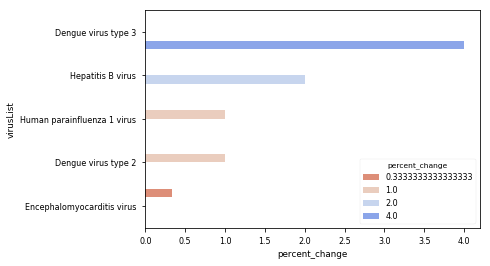

In [94]:
# Only increasing hits in a barchart
barchart = sns.barplot(x=data['percent_change'], y=data['virusList'], hue=data['percent_change'], palette='coolwarm_r')

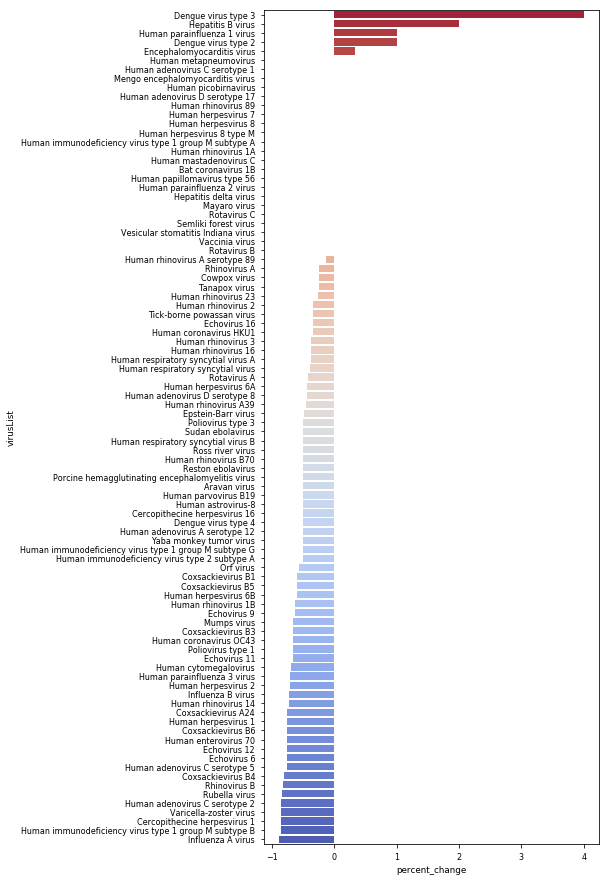

In [95]:
# All hits in a barchart
fig, ax = plt.subplots()
fig.set_figheight(len(sorted_hits)/6)
barchart_all = sns.barplot(x=sorted_hits['percent_change'], y=sorted_hits['virusList'], palette='coolwarm_r')